In [96]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
import time
####################you will need to change some paths here!#####################
#list of input files
dir_in='f:/data/tc_wakes/database/info/'
dir_out='f:/data/tc_wakes/database/sst/'
dir_mur = 'F:/data/sst/jpl_mur/v4.1/'
dir_flux = 'F:/data/model_data/oaflux/data_v3/daily/turbulence/'
#output files
#filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.nc'
#filename_out_kml='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/data_so_far.kml'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib as mpl
#import openpyxl
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import math
#from math import cos, radians

In [236]:
iwrap = 0
new_lat = np.linspace(-89.875, 89.875, 720)
new_lon = np.linspace(-179.875, 179.875, 1440)
minlat, maxlat, minlon, maxlon = -60.125, -30.125, -170.875, 170.875
#minlat, maxlat, minlon, maxlon = -60.125, -30.125, -60.875, -10.875
#minlat, maxlat, minlon, maxlon = -60.125, -30.125, 10.875, 60.875
#minlat, maxlat, minlon, maxlon = -60.125, -30.125, -20.875, 20.875
xdim_storm,ydim_storm = round((maxlon - minlon)/.25),round((maxlat - minlat)/.25)
new_lat_storm = np.linspace(minlat, maxlat, ydim_storm)
new_lon_storm = np.linspace(minlon, maxlon, xdim_storm)
if minlon<-90 and maxlon>=90:  #this storm wraps
    iwrap = 1
    minlon += 360
    maxlon2 = maxlon
    minlon, maxlon = maxlon2, minlon
    xdim_storm = round((maxlon - minlon)/.25)
    new_lon_storm = np.linspace(minlon, maxlon, xdim_storm)
print(iwrap,xdim_storm, new_lon_storm[:5],new_lon_storm[-5:])
#print(new_lon_storm)

1 73 [170.875      171.12847222 171.38194444 171.63541667 171.88888889] [188.11111111 188.36458333 188.61805556 188.87152778 189.125     ]


In [243]:
storm_date = dt.datetime(2015,1,1)
syr=str(storm_date.year)
smon=str(storm_date.month)
sdym=str(storm_date.day)
sjdy=str(storm_date.timetuple().tm_yday)
fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
mur_filename = dir_cmc + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
ds_day = xr.open_dataset(mur_filename,drop_variables=['analysis_error','sea_ice_fraction'])
if iwrap==1:  #move data from -180 to 180 to 0 360
    ds_day.coords['lon'] = np.mod(ds_day['lon'], 360)
    ds_day = ds_day.sortby(ds_day.lon)
ds_storm = ds_day.interp(lat = new_lat_storm,lon = new_lon_storm)
#print(ds_day)
ds_day.close()
ds_storm

FileNotFoundError: [Errno 2] No such file or directory: b'F:\\data\\sst\\cmc\\CMC0.2deg\\v2\\2015\\001\\20150101090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'

In [240]:
ds_day

<xarray.Dataset>
Dimensions:       (lat: 17999, lon: 36000, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2015-01-01T09:00:00
  * lat           (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon           (lon) float32 -179.99 -179.98 -179.97 ... 179.98 179.99 180.0
Data variables:
    analysed_sst  (time, lat, lon) float32 ...
    mask          (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    comment:                    MUR = "Multi-scale Ultra-high Reolution"
    license:                    These data are available free of charge under...
    id:                   

In [244]:
dir_cmc = 'F:/data/sst/cmc/CMC0.2deg/v2/'
fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
filename = dir_cmc + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
ds=xr.open_dataset(filename,drop_variables=['analysis_error','sea_ice_fraction'])
print(ds)
ds.close()

<xarray.Dataset>
Dimensions:           (lat: 901, lon: 1800, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2015-01-01T12:00:00
  * lat               (lat) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
  * lon               (lon) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temperature an...
    summary:                    Applies the method of statistical interpolati...
    references:                 Brasnett B. 2008. The impact of satellite ret...
    institution:                CMC
    history:                    Processed through sfc.thin_sst, sfc.sstobs, i...
    comment:                    WARNING Some applications are un

In [ ]:
ds_day = ds.sel(time = idyjl)  #select day of year from annual file
if iwrap==0:
    ds_day.coords['lon'] = (ds_day.coords['lon'] + 180) % 360 - 180
    ds_day = ds_day.sortby(ds_day.lon)
ds.close()
ds_storm = ds_day.interp(lat = new_lat_storm,lon = new_lon_storm)
print(ds_storm)
if iwrap==1:
    ds_storm.coords['lon'] = (ds_storm.coords['lon'] + 180) % 360 - 180
#    ds_storm = ds_storm.sortby(ds_storm.lon)
print(ds_storm)

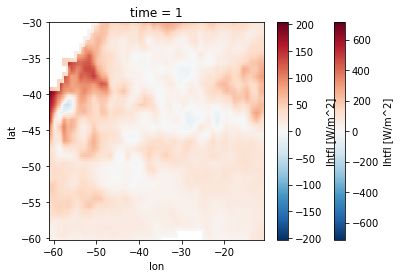

In [214]:
#ds
ds_day.lhtfl.plot()

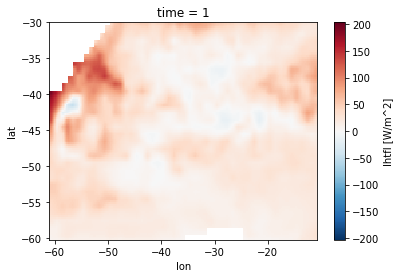

In [195]:
ds_storm.lhtfl.plot()
#ds_storm.longitude[:]

In [173]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
lyr, idyjl = 2015,1
storm_date = dt.datetime(2015,1,1)
syr, smon, sdym, sjdy=str(storm_date.year),str(storm_date.month),str(storm_date.day),str(storm_date.timetuple().tm_yday)
fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      
ds=xr.open_dataset(ccmp_filename)
ds_day = ds.mean(dim='time')     #take average across all 6 hourly data fields
if iwrap==0:
    ds_day.coords['longitude'] = (ds_day.coords['longitude'] + 180) % 360 - 180
ds_day = ds_day.sortby(ds_day.longitude)
ds.close()
ds_storm = ds_day.interp(latitude = new_lat_storm,longitude = new_lon_storm)
ds_storm
ds_storm2 = ds_storm.sortby(ds_storm.longitude)
print(ds_storm.dims)




plt.plot(ds_storm.uwnd[0,:],'r')
ds_day2 = np.append(ds_day.uwnd[:,720:],ds_day.uwnd[:,:720], axis=1)               
plt.plot(ds_day2[73,:])
#print(ds_day.uwnd[70,683:763])
#print(ds_storm.uwnd[0,:])

AttributeError: 'Dataset' object has no attribute 'uwnd'

In [143]:
print(ds_day.latitude[73].data,ds_storm.latitude[0].data)


-60.125 -60.125


In [6]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
#    for ii in range(12,13): 
    lonmin=180
    lonmax=-180
    for name in files:
    #    name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        #print(fname_in[31:35],fname_in[36:39])
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        #print(iyr_storm,inum_storm)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat
        lons = dsx.lon
        if lonmin>min(lons[0,:].values):
            lonmin=min(lons[0,:].values)
        if lonmax<max(lons[0,:].values):
            lonmax=max(lons[0,:].values)
    print(iyr_storm,lonmin,lonmax)
print(type(lons))

NameError: name 'iyr_storm' is not defined

In [7]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
    for ii in range(32,33): 
#    for name in files:
        name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        if iyr_storm!=2004:
            continue
        if iyr_storm==2004:
            print(iyr_storm,inum_storm)
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat[0,:]
        lons = dsx.lon[0,:]  #lons goes from 0 to 360
        dysince = dsx.time
        #minlon=min(lons[0,:].values)-10
        #maxlon=max(lons[0,:].values)+10
        #minlat=min(lats[0,:].values)-10
        #maxlat=max(lats[0,:].values)+10
        
        iwrap=0
        minlon=min(lons.values)-10
        maxlon=max(lons.values)+10
        minlat=min(lats.values)-10
        maxlat=max(lats.values)+10
        if minlon<10 and maxlon>350:  #wrapping around meridion need to cal new min/max lon
            minlon=max(lons[lons<180].values)+10
            maxlon=min(lons[lons>180].values)-10
            iwrap=1 #set flag for wraparound
        print(minlon,maxlon,minlat,maxlat)
        print('min/max lon lat',minlon,maxlon,minlat,maxlat)

        ix1=int(round((minlon-dx_offset)/dx))
        ix2=int(round((maxlon-dx_offset)/dx))
        iy1=int(round((minlat-dy_offset)/dy))
        iy2=int(round((maxlat-dy_offset)/dy))
        if iy2 > 628:
            iy2=628
        if iy1 < 1:
            iy1=1    
        if ix1 < 0:
            ix1 = ix1 + 1440
        if ix2 < 0:
            ix2 = ix2 + 1440
        #if ix1 > 1440:
        #    ix1 = ix1 - 1440
        #if ix2 > 1440:
        #    ix2 = ix2 - 1440
        print(minlon,maxlon,minlat,maxlat)
        xdim=ix2-ix1
        if iwrap==1:  #wraps around so make sure xdim reflects that
            xdim=ix1-ix2+1440

        ydim=iy2-iy1
        
        print('ix',ix1,ix2,xdim)
        print('iy',iy1,iy2,ydim)
        
        dims=lats.shape
        tdim=dims[0]
#        tdim=dims[1]
        tem_date=[0]*tdim #print(dysince.values)
        for i in range(0,tdim):
            tem_date[i]=date_1858+dt.timedelta(days=float(dysince[0,i].values))  #create new time array that can be queried for year etc
        minjdy = min(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        minyear =min(tem_date).year #create new time array that can be queried for year etc
        maxjdy = max(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        maxyear =max(tem_date).year  #create new time array that can be queried for year etc
        print(minyear,minjdy,maxyear,maxjdy)
        
        dif = max(tem_date)-min(tem_date)
        tdim=int(dif.days)+30

        print(tdim,ix1,ix2,iy1,iy2,xdim,ydim)      
        
        #if xdim>720:
            #ix1=int(round((minlon+dx_offset)/dx))+1441 #for when wraps 180 to -180
            #ix2=int(round((maxlon+dx_offset)/dx))
            #xdim=abs(xdim-1440)
        #    xdim=ix1-ix2+1440
        #    print('xdim wrapped:',xdim,ix1,ix2)
        
        
        #print('min/max lon lat ARRAY',lons(ix1),lons(ix2))
        


 

IndexError: list index out of range

In [4]:
i=0
storm_date = tem_date[0]+dt.timedelta(days=i)
            #print(storm_date)
            
syr=str(storm_date.year)
smon=str(storm_date.month)
sdym=str(storm_date.day)
sjdy=str(storm_date.timetuple().tm_yday)
fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
mur_filename = dir_mur + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
start_time = time.clock()
lon_grid = np.zeros(xdim)
for j in range(0,xdim):
    lon_grid[j]=(j+ix1)*dx+dx_offset
    if lon_grid[j]>180:
        lon_grid[j]=lon_grid[j]-360
lat_grid = np.zeros(ydim)
for j in range(0,ydim):
    lat_grid[j]=(j+iy1)*dy+dy_offset
print(mur_filename)
ds_mur = xr.open_dataset(mur_filename,drop_variables=['analysis_error','mask','sea_ice_fraction'])
ds_subset = ds_mur.interp(lon=lon_grid, lat=lat_grid)
end_time = time.clock()
print(end_time-start_time)
print(ds_subset)

C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


F:/data/sst/jpl_mur/v4.1/2004/194/20040712090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc
17.775270981999995
<xarray.Dataset>
Dimensions:       (lat: 129, lon: 172, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2004-07-12T09:00:00
  * lon           (lon) float64 -138.4 -138.1 -137.9 ... -96.12 -95.88 -95.62
  * lat           (lat) float64 4.625 4.875 5.125 5.375 ... 36.12 36.38 36.62
Data variables:
    analysed_sst  (time, lat, lon) float64 301.7 301.5 301.7 ... nan nan nan
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    comment:                    MUR = "Multi-scale Ultra-high Reolution"
    license: 

C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


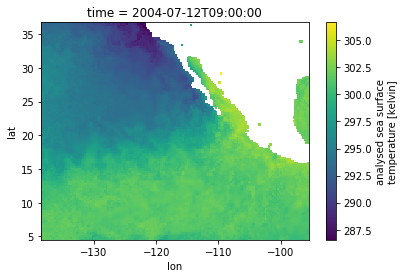

In [5]:
ds_subset.analysed_sst.plot()

In [6]:
ilat_mur1 = np.argmin(abs(mlat-minlat))
ilat_mur2 = np.argmin(abs(mlat-maxlat))
print(ilat_mur1,ilat_mur2)

NameError: name 'mlat' is not defined

In [17]:
from math import ceil 
for i in range(0,1):
    for j in range(0,1):
            start_time = time.clock()
            print(mur_filename)
            nc_fid = Dataset(mur_filename, 'r')
            mlat = nc_fid.variables['lat'][1149:16849]
            minlat_tem = minlat+
            ilat_mur1 = np.argmin(abs(mlat-minlat))-100
            tem_lat_mur = mlat[ilat_mur1]   #make sure it is on .25 grid
            ilat_mur2 = np.argmin(abs(mlat-maxlat))+100
            print('lat:', mlat[ilat_mur2],maxlat)
            int_25=math.ceil((ilat_mur2-ilat_mur1)/25)
            ilat_mur2=ilat_mur1+25*int_25
            print('lat:', mlat[ilat_mur2],maxlat)
            print(ilat_mur1,ilat_mur2)
            #mlat = nc_fid.variables['lat'][ilat_mur1:ilat_mur2]
            mlat = mlat[ilat_mur1:ilat_mur2]
            sst = nc_fid.variables['analysed_sst'][0,ilat_mur1:ilat_mur2,:]
            mlon = nc_fid.variables['lon'][:]
            nc_fid.close()
            coarseness = 25  #this code resamples all data into 25 km cells then takes the mean of all that data 
            temp = mlon.reshape((mlon.shape[0] // coarseness, coarseness))
            coarse_mlon = np.mean(temp, axis=(1), dtype=np.float64)
            temp = mlat.reshape((mlat.shape[0] // coarseness, coarseness))
            coarse_mlat = np.mean(temp, axis=(1), dtype=np.float64)
            temp = sst.reshape((sst.shape[0] // coarseness, coarseness, sst.shape[1] // coarseness, coarseness))
            coarse_sst = np.mean(temp, axis=(1,3), dtype=np.float64)
            
            #need to recalculate iy1 and iy2 because of offset made earlier to read less of file
            iy1=np.argmin(abs(coarse_mlat-minlat))
            iy2=np.argmin(abs(coarse_mlat-maxlat))
            ydim=iy2-iy1   
            print(coarse_mlat[0],coarse_mlat[-1])
            print(iy1,iy2,ydim,minlat,maxlat)
            
            if i==0:
                print('i=0',iy1,iy2,ix1,ix2,iy2-iy1,ix2-ix1)
            if ix1<=1440 and ix2<=1440 and iwrap==0:
                if i==0:
                    print('inside1',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix1:ix2]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix1:ix2]
            if ix1>1440 and ix2>1440 and iwrap==0:
                if i==0:
                    print('inside2',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix1-1440:ix2-1440]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix1-1440:ix2-1440]
            if ix1<=1440 and ix2>1440 and iwrap==0:
                if i==0:
                    print('inside3',iy1,iy2,ix1,ix2)
                tem1 = coarse_sst[iy1:iy2,ix1:]
                tem2 = coarse_sst[iy1:iy2,:ix2-1440]
                sst_out = np.append(tem1,tem2, axis=1)
                mlat_out = coarse_mlat[iy1:iy2]
                mlon1 = coarse_mlon[ix1:]
                mlon2 = coarse_mlon[:ix2-1440]
                print(mlon1.shape,mlon2.shape)
                mlon_out = np.append(mlon1,mlon2, axis=0)               

            if ix1<=1440 and ix2>1440 and iwrap==1:
                if i==0:
                    print('inside1',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix2-1440:ix1]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix2-1440:ix1]

end_time = time.clock()
print(end_time-start_time)

C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


F:/data/sst/jpl_mur/v4.1/2004/194/20040712090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc
lat: 37.9 36.899999398738146
lat: 38.1 36.899999398738146
8210 11660
3.72 37.97
4 133 129 4.59999967366457 36.899999398738146
i=0 4 133 1606 1778 129 172
inside2 4 133 1606 1778
4.255711917999633


C:\Users\gentemann\Miniconda3\lib\site-packages\ipykernel_launcher.py:69: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [18]:
sst_out.shape
#coarse_sst.shape
#ds_mur.lon

(129, 172)

In [ ]:
for i in range(0,10):
#    print(mlon_out[i],ds_subset.lon.data[i])
#    print(mlat_out[i],ds_subset.lat.data[i])
    print(sst_out[i,0],ds_subset.analysed_sst.data[0,i,0])

In [ ]:
diff=sst_out-ds_subset.analysed_sst[0,:,:]

In [ ]:
diff

In [ ]:
###### dir_mur = 'F:/data/sst/jpl_mur/v4.1/'
for root, dirs, files in os.walk(dir_in, topdown=False):
#    for ii in range(12,13): 
    for name in files:
    #    name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        if iyr_storm>2003 or iyr_storm<2003:
            continue
#        if iyr_storm==2011 and inum_storm<15:
#            continue
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat[0,:]
        lons = dsx.lon[0,:]  #lons goes from 0 to 360
        dysince = dsx.time
        #minlon=min(lons[0,:].values)-10
        #maxlon=max(lons[0,:].values)+10
        #minlat=min(lats[0,:].values)-10
        #maxlat=max(lats[0,:].values)+10
        
        iwrap=0
        minlon=min(lons.values)-10
        maxlon=max(lons.values)+10
        minlat=min(lats.values)-10
        maxlat=max(lats.values)+10
        if minlon<10 and maxlon>350:  #wrapping around meridion need to cal new min/max lon
            minlon=max(lons[lons<180].values)+10
            maxlon=min(lons[lons>180].values)-10
            iwrap=1 #set flag for wraparound
        
        
        
        #here is a fix for when a storm goes from 350 across 360 to 1 2 longitude
#        iwrap=0
#        print('first and last!',lons[0,1].values,lons[0,-1].values)
#        if abs(min(lons[0,:].values)-max(lons[0,:].values))>180:
#            lons1=lons[0,:].values-10>180
#            lons2=lons[0,:].values+10<180
#            maxlon=min(lons[0,lons1].values-10)
#            minlon=max(lons[0,lons2].values+10)
#            print('wrapped',minlon,maxlon)
#            iwrap=1
            #wrap_lons = ((lons+180) % 360) - 180        
            #maxlon=max(wrap_lons[0,:].values)+10 #this will find the positive maximum
            #minlon=min(wrap_lons[0,:].values)-10
            #if minlon<0:
            #    maxlon=min(wrap_lons[0,:].values)-10+360
            #    minlon=max(wrap_lons[0,:].values)+10

        print('min/max lon lat',minlon,maxlon,minlat,maxlat)

        ix1=int(round((minlon-dx_offset)/dx))
        ix2=int(round((maxlon-dx_offset)/dx))
        iy1=int(round((minlat-dy_offset)/dy))
        iy2=int(round((maxlat-dy_offset)/dy))
        if iy2 > 628:
            iy2=628
        if iy1 < 1:
            iy1=1    
        if ix1 < 0:
            ix1 = ix1 + 1440
        if ix2 < 0:
            ix2 = ix2 + 1440
        #if ix1 > 1440:
        #    ix1 = ix1 - 1440
        #if ix2 > 1440:
        #    ix2 = ix2 - 1440
        print(minlon,maxlon,minlat,maxlat)
        xdim=ix2-ix1
        if iwrap==1:  #wraps around so make sure xdim reflects that
            xdim=ix1-ix2+1440

        ydim=iy2-iy1
        
        dims=lats.shape
        tdim=dims[0]
#        tdim=dims[1]
        tem_date=[0]*tdim #print(dysince.values)
        for i in range(0,tdim):
            tem_date[i]=date_1858+dt.timedelta(days=float(dysince[0,i].values))  #create new time array that can be queried for year etc
        minjdy = min(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        minyear =min(tem_date).year #create new time array that can be queried for year etc
        maxjdy = max(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        maxyear =max(tem_date).year  #create new time array that can be queried for year etc
        print(minyear,minjdy,maxyear,maxjdy)
        
        dif = max(tem_date)-min(tem_date)
        tdim=int(dif.days)+30

        #need to think about how it wraps around before putting in
        #box add a mask that removes all data except that near storm
        #storm_mask = np.ones([628,1440], dtype=bool)
        #for i in range(0,tdim):
        #    float(lats[0,i].values)
        #    lat1 = int(round((float(lats[0,i].values)-10-dy_offset)/dy))
        #    lon1 = int(round((float(lons[0,i].values)-10-dx_offset)/dx))
        #    lat2 = int(round((float(lats[0,i].values)+10-dy_offset)/dy))+1
        #    lon2 = int(round((float(lons[0,i].values)+10-dx_offset)/dx))+1 #python index goes from index1 up to but not including index2
        #    if lat2>628:
        #        lat2=628
        #    if lat1<0:
        #        lat1=0
        #    if lon1>=0 and lon2<=1440:
        #        storm_mask[lat1:lat2,lon1:lon2]=bool(0)
        #    if lon1<0 and lon2<=1440:
        #        storm_mask[lat1:lat2,:lon2]=1.
        #        storm_mask[lat1:lat2,lon1+1440:]=bool(0)
        #    if lon1>=0 and lon2>1440:
        #        storm_mask[lat1:lat2,lon1:]=1.
        #        storm_mask[lat1:lat2,:lon2-1440:]=bool(0)              

        print(tdim,ix1,ix2,iy1,iy2,xdim,ydim)      
        
        #if xdim>720:
            #ix1=int(round((minlon+dx_offset)/dx))+1441 #for when wraps 180 to -180
            #ix2=int(round((maxlon+dx_offset)/dx))
            #xdim=abs(xdim-1440)
        #    xdim=ix1-ix2+1440
        #    print('xdim wrapped:',xdim,ix1,ix2)
        
        
        #print('min/max lon lat ARRAY',lons(ix1),lons(ix2))
        
        sst_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        sst_clim_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndu_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndv_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndu_clim_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndv_clim_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        
        print('sst_out_sv',sst_out_sv.shape)
        for i in range(0,tdim):
            storm_date = tem_date[0]+dt.timedelta(days=i)
            #print(storm_date)
            
            syr=str(storm_date.year)
            smon=str(storm_date.month)
            sdym=str(storm_date.day)
            sjdy=str(storm_date.timetuple().tm_yday)
            fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
            mur_filename = dir_mur + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
            fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
            ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      

            if storm_date.timetuple().tm_yday==366:
                sjdy = '365'
            clim_filename='F:/data/sst/jpl_mur/v4.1/clim/clim2_' + sjdy.zfill(3) +'_2003_2013_MUR-GLOB-v02.0-fv04.1.nc'
            ccmp_clim_filename='F:/data/sat_data/ccmp/v02.0/clim/ccmp_daily_clim_' + sjdy.zfill(3) +'.nc'
            print(ccmp_filename)
            print(ccmp_clim_filename)

#            nc_fid3 = Dataset(ccmp_filename, 'r')
#            nc_fid4 = Dataset(ccmp_clim_filename, 'r')          
            
            nc_fid = Dataset(mur_filename, 'r')
            sst = nc_fid.variables['analysed_sst'][0,1149:16849,:]
            mlat = nc_fid.variables['lat'][1149:16849]
            mlon = nc_fid.variables['lon'][:]
            nc_fid.close()

            coarseness = 25
            temp = mlon.reshape((mlon.shape[0] // coarseness, coarseness))
            coarse_mlon = np.mean(temp, axis=(1), dtype=np.float64)
            temp = mlat.reshape((mlat.shape[0] // coarseness, coarseness))
            coarse_mlat = np.mean(temp, axis=(1), dtype=np.float64)
            temp = sst.reshape((sst.shape[0] // coarseness, coarseness, sst.shape[1] // coarseness, coarseness))
            coarse_sst = np.mean(temp, axis=(1,3), dtype=np.float64)
            
            nc_fid2 = Dataset(clim_filename, 'r')                      
            sst_clim = nc_fid2.variables['sst'][1149:16849,:]
            nc_fid2.close()
            
            temp = sst_clim.reshape((sst_clim.shape[0] // coarseness, coarseness, sst_clim.shape[1] // coarseness, coarseness))
            coarse_sst_clim = np.mean(temp, axis=(1,3), dtype=np.float64)
 
            nc_fid = Dataset(ccmp_filename, 'r')
            nc_fid2 = Dataset(ccmp_clim_filename, 'r')  
            tem = nc_fid.variables['uwnd'][:]
            tem = np.mean(tem,axis=0)
            wndu = np.append(tem[:,720:],tem[:,:720], axis=1)               
            tem = nc_fid.variables['vwnd'][:]
            tem = np.mean(tem,axis=0)
            wndv = np.append(tem[:,720:],tem[:,:720], axis=1)               
            mlat_ccmp = nc_fid.variables['latitude'][:]
            tem = nc_fid.variables['longitude'][:]
            mlon_ccmp = np.append(tem[720:],tem[:720], axis=0)               
            mlon_ccmp = ((mlon_ccmp - 180) % 360) - 180  #make -180 to 180 rather than 0 360
            tem = nc_fid2.variables['av_u'][:]
            wndu_clim = np.append(tem[:,720:],tem[:,:720], axis=1)               
            tem = nc_fid2.variables['av_v'][:]
            wndv_clim = np.append(tem[:,720:],tem[:,:720], axis=1)               
            nc_fid.close()
            nc_fid2.close()
            
            #data_mask = coarse_sst.mask
            #data_mask[storm_mask==bool(1)]=bool(1)
            #coarse_sst.mask = data_mask
            #coarse_sst_clim.mask = data_mask         
            
            if i==0:
                print('i=0',iy1,iy2,ix1,ix2,iy2-iy1,ix2-ix1)
            if ix1<=1440 and ix2<=1440 and iwrap==0:
                if i==0:
                    print('inside1',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix1:ix2]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix1:ix2]
                sst_clim_out = coarse_sst_clim[iy1:iy2,ix1:ix2]
                wndu_out = wndu[iy1:iy2,ix1:ix2]
                wndu_clim_out = wndu_clim[iy1:iy2,ix1:ix2]
                wndv_out = wndv[iy1:iy2,ix1:ix2]
                wndv_clim_out = wndv_clim[iy1:iy2,ix1:ix2]
            if ix1>1440 and ix2>1440 and iwrap==0:
                if i==0:
                    print('inside2',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix1-1440:ix2-1440]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix1-1440:ix2-1440]
                sst_clim_out = coarse_sst_clim[iy1:iy2,ix1-1440:ix2-1440]
                wndu_out = wndu[iy1:iy2,ix1-1440:ix2-1440]
                wndu_clim_out = wndu_clim[iy1:iy2,ix1-1440:ix2-1440]
                wndv_out = wndv[iy1:iy2,ix1-1440:ix2-1440]
                wndv_clim_out = wndv_clim[iy1:iy2,ix1-1440:ix2-1440]
            if ix1<=1440 and ix2>1440 and iwrap==0:
                if i==0:
                    print('inside3',iy1,iy2,ix1,ix2)
                tem1 = coarse_sst[iy1:iy2,ix1:]
                tem2 = coarse_sst[iy1:iy2,:ix2-1440]
                sst_out = np.append(tem1,tem2, axis=1)
                mlat_out = coarse_mlat[iy1:iy2]
                mlon1 = coarse_mlon[ix1:]
                mlon2 = coarse_mlon[:ix2-1440]
                print(mlon1.shape,mlon2.shape)
                mlon_out = np.append(mlon1,mlon2, axis=0)               
                tem1 = coarse_sst_clim[iy1:iy2,ix1:]
                tem2 = coarse_sst_clim[iy1:iy2,:ix2-1440]
                sst_clim_out = np.append(tem1,tem2, axis=1)

                tem1 = wndu[iy1:iy2,ix1:]
                tem2 = wndu[iy1:iy2,:ix2-1440]
                wndu_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv[iy1:iy2,ix1:]
                tem2 = wndv[iy1:iy2,:ix2-1440]
                wndv_out = np.append(tem1,tem2, axis=1)
                tem1 = wndu_clim[iy1:iy2,ix1:]
                tem2 = wndu_clim[iy1:iy2,:ix2-1440]
                wndu_clim_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv_clim[iy1:iy2,ix1:]
                tem2 = wndv_clim[iy1:iy2,:ix2-1440]
                wndv_clim_out = np.append(tem1,tem2, axis=1)

            if ix1<=1440 and ix2>1440 and iwrap==1:
                if i==0:
                    print('inside1',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix2-1440:ix1]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix2-1440:ix1]
                sst_clim_out = coarse_sst_clim[iy1:iy2,ix2-1440:ix1]
                wndu_out = wndu[iy1:iy2,ix2-1440:ix1]
                wndu_clim_out = wndu_clim[iy1:iy2,ix2-1440:ix1]
                wndv_out = wndv[iy1:iy2,ix2-1440:ix1]
                wndv_clim_out = wndv_clim[iy1:iy2,ix2-1440:ix1]

            if i==0:
                print('sst',sst_out.shape,'sst_sv',sst_out_sv.shape)
                print('mlon',mlon_out.shape,'mlat',mlat_out.shape)
            #sst_sv[i,:,:]=sst-sst_clim
            sst_out_sv[i,:,:]=sst_out
            sst_clim_out_sv[i,:,:]=sst_clim_out
            wndu_out_sv[i,:,:]=wndu_out
            wndv_out_sv[i,:,:]=wndv_out
            wndu_clim_out_sv[i,:,:]=wndu_clim_out
            wndv_clim_out_sv[i,:,:]=wndv_clim_out
            
        ilen=len(fname_in)
        
        dif_dys=[0]*tdim
        for i in range(0,tdim):
            dif_dys[i] = i

        print('file out:',fname_out)
        #f.close()
        f = Dataset(fname_out,'w', format='NETCDF4') 
        tempgrp = f.createGroup('data')
        tempgrp.setncattr_string('start time',str(tem_date[0]))
        tempgrp.createDimension('t', tdim)
        tempgrp.createDimension('y', ydim)
        tempgrp.createDimension('x', xdim)

    #tem_date[i]
        sst_netcdf = tempgrp.createVariable('sst', 'f4', ('t', 'y', 'x'))
        sst_clim_netcdf = tempgrp.createVariable('sst_clim', 'f4', ('t', 'y', 'x'))
        wndu_netcdf = tempgrp.createVariable('wndu', 'f4', ('t', 'y', 'x'))
        wndv_netcdf = tempgrp.createVariable('wndv', 'f4', ('t', 'y', 'x'))
        wndu_clim_netcdf = tempgrp.createVariable('wndu_clim', 'f4', ('t', 'y', 'x'))
        wndv_clim_netcdf = tempgrp.createVariable('wndv_clim', 'f4', ('t', 'y', 'x'))
        longitude = tempgrp.createVariable('lon', 'f4', 'x')
        latitude = tempgrp.createVariable('lat', 'f4', 'y')  
        time = tempgrp.createVariable('time', 'i4', 't')
        
        sst_netcdf[:] = sst_out_sv
        sst_clim_netcdf[:] = sst_clim_out_sv
        wndu_netcdf[:] = wndu_out_sv
        wndv_netcdf[:] = wndv_out_sv
        wndu_clim_netcdf[:] = wndu_clim_out_sv
        wndv_clim_netcdf[:] = wndv_clim_out_sv
        latitude[:] = mlat_out
        longitude[:] = mlon_out
        time[:]=dif_dys
        f.close()
    


In [ ]:
dims[0]

In [ ]:
print(lons.shape)
print(lons[0,68:].shape,69-68)
print(lons[0,67:].shape,69-67)
print(lons.shape)
print(lons[0,:0].shape,0)
print(lons[0,:1].shape,1)
lons

In [ ]:
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlab
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)

dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
    for ii in range(12,13): 
#    for name in files:
        name = files[ii]
#    for name in files:
        fname_tem=os.path.join(root, name)
        fname_in=dir_out + fname_tem[31:39] + '_all_25km.nc'

        #nc_fid.close()
        nc_fid = Dataset(fname_in, 'r')
        tempgrp = nc_fid.groups['data']
        #tempgrp = nc_fid.createGroup('Eddy_data')
        sst = tempgrp.variables['sst'][:]
        sst_clim = tempgrp.variables['sst_clim'][:]
        wndu = tempgrp.variables['wndu'][:]
        wndv = tempgrp.variables['wndv'][:]
        lon = tempgrp.variables['lon'][:]
        lat = tempgrp.variables['lat'][:]
        time = tempgrp.variables['time'][:]
        nc_fid.close()
        
        sst_diff = sst -273.15 - sst_clim
        print(sst.shape,sst_clim.shape)
        fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5.4))
        # plot using 'continuous' color map
        im = ax1.imshow(sst_diff[30,:,:], interpolation='bilinear',
                        cmap=palette,
                        norm=colors.Normalize(vmin=-5.0, vmax=5.0),
                        aspect='auto',
                        origin='lower')
                        #extent=[x0, x1, y0, y1])
        ax1.set_title('SST')
        cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
        cbar.set_label('SST - SST climatology')
        for ticklabel in ax1.xaxis.get_ticklabels():
            ticklabel.set_visible(False)
        plt.show()
        

In [ ]:
    
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.mlab as mlab
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5.4))
# plot using 'continuous' color map
im = ax1.imshow(coarse_sst, interpolation='bilinear',
                cmap=palette,
                norm=colors.Normalize(vmin=-2.0, vmax=32.0),
                aspect='auto',
                origin='lower')
                #extent=[x0, x1, y0, y1])
ax1.set_title('SST')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('uniform')
for ticklabel in ax1.xaxis.get_ticklabels():
    ticklabel.set_visible(False)
plt.show()

In [ ]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y' 
fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
ccmp_filename = dir_ccmp + syr + '/M' + smon + fname_tem      
#ccmp_clim_filename='F:/data/sat_data/ccmp/v02.0/clim/ccmp_daily_clim_' + sjdy.zfill(3) +'.nc'
print(ccmp_filename)
nc_fid = Dataset(ccmp_filename, 'r')
tem = nc_fid.variables['uwnd'][:]
tem2 = np.append(tem[:,721:],tem[:,:721], axis=1)               
nc_fid.close()
print(tem.shape)
print(tem2.shape)

In [ ]:
nc_fid3.close()
nc_fid4.close()


In [ ]:
sst_out[1:5,1:5]

In [ ]:

dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
#    for ii in range(12,13): 
    for name in files:
    #    name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        if iyr_storm<2005:
            continue
        if iyr_storm==2005 and inum_storm<70:
            continue
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat
        lons = dsx.lon
        dysince = dsx.time
        len_lons = lons.shape
        minlon=min(lons[0,:].values)-10
        maxlon=max(lons[0,:].values)+10
        minlat=min(lats[0,:].values)-10
        maxlat=max(lats[0,:].values)+10
        #here is a fix for when a storm goes from 350 across 360 to 1 2 longitude
        if lons[0,1].values>180 and lons[0,-1].values<180:
            wrap_lons = ((lons+180) % 360) - 180        
            minlon=min(wrap_lons[0,:].values)-10
            maxlon=max(wrap_lons[0,:].values)+10
        if minlon<0:
            minlon=minlon+360
        if maxlon>360:
            maxlon=maxlon-360
        print(minlon,maxlon,minlat,maxlat)
        print(lons)
        #print(wrap_lons)
        break



In [ ]:
print(lons[0,1].values,lons[0,len_lon[1]].values)
lons

In [ ]:
 
minlon=10
maxlon=293
ix1=int(round((minlon-dx_offset)/dx))
ix2=int(round((maxlon-dx_offset)/dx))
print(ix1,ix2,)
 

In [ ]:
            if ix1<=1440 and ix2<=1440 and iwrap==0:
                if i==0:
                    print('inside1',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix1:ix2]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix1:ix2]
                sst_clim_out = coarse_sst_clim[iy1:iy2,ix1:ix2]
                wndu_out = wndu[iy1:iy2,ix1:ix2]
                wndu_clim_out = wndu_clim[iy1:iy2,ix1:ix2]
                wndv_out = wndv[iy1:iy2,ix1:ix2]
                wndv_clim_out = wndv_clim[iy1:iy2,ix1:ix2]
            if ix1>1440 and ix2>1440:
                if i==0:
                    print('inside2',iy1,iy2,ix1,ix2)
                sst_out = coarse_sst[iy1:iy2,ix1-1440:ix2-1440]
                mlat_out = coarse_mlat[iy1:iy2]
                mlon_out = coarse_mlon[ix1-1440:ix2-1440]
                sst_clim_out = coarse_sst_clim[iy1:iy2,ix1-1440:ix2-1440]
                wndu_out = wndu[iy1:iy2,ix1-1440:ix2-1440]
                wndu_clim_out = wndu_clim[iy1:iy2,ix1-1440:ix2-1440]
                wndv_out = wndv[iy1:iy2,ix1-1440:ix2-1440]
                wndv_clim_out = wndv_clim[iy1:iy2,ix1-1440:ix2-1440]
            if ix1<=1440 and ix2>1440:
                if i==0:
                    print('inside3',iy1,iy2,ix1,ix2)
                tem1 = coarse_sst[iy1:iy2,ix1:]
                tem2 = coarse_sst[iy1:iy2,:ix2-1440]
                sst_out = np.append(tem1,tem2, axis=1)
                mlat_out = coarse_mlat[iy1:iy2]
                mlon1 = coarse_mlon[ix1:]
                mlon2 = coarse_mlon[:ix2-1440]
                print(mlon1.shape,mlon2.shape)
                mlon_out = np.append(mlon1,mlon2, axis=0)               
                tem1 = coarse_sst_clim[iy1:iy2,ix1:]
                tem2 = coarse_sst_clim[iy1:iy2,:ix2-1440]
                sst_clim_out = np.append(tem1,tem2, axis=1)

                tem1 = wndu[iy1:iy2,ix1:]
                tem2 = wndu[iy1:iy2,:ix2-1440]
                wndu_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv[iy1:iy2,ix1:]
                tem2 = wndv[iy1:iy2,:ix2-1440]
                wndv_out = np.append(tem1,tem2, axis=1)
                tem1 = wndu_clim[iy1:iy2,ix1:]
                tem2 = wndu_clim[iy1:iy2,:ix2-1440]
                wndu_clim_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv_clim[iy1:iy2,ix1:]
                tem2 = wndv_clim[iy1:iy2,:ix2-1440]
                wndv_clim_out = np.append(tem1,tem2, axis=1)
                
            if ix1>1440 and ix2<1440:
                if i==0:
                    print('inside4',iy1,iy2,ix1,ix2)
                tem1 = coarse_sst[iy1:iy2,ix2:]
                tem2 = coarse_sst[iy1:iy2,:ix1-1440]
                sst_out = np.append(tem1,tem2, axis=1)
                mlat_out = coarse_mlat[iy1:iy2]
                mlon1 = coarse_mlon[ix2:]
                mlon2 = coarse_mlon[:ix1-1440]
                print(mlon1.shape,mlon2.shape)
                mlon_out = np.append(mlon1,mlon2, axis=0)               
                sst1 = coarse_sst_clim[iy1:iy2,ix2:]
                sst2 = coarse_sst_clim[iy1:iy2,:ix1-1440]
                sst_clim_out = np.append(sst1,sst2, axis=1)

                tem1 = wndu[iy1:iy2,ix2:]
                tem2 = wndu[iy1:iy2,:ix1-1440]
                wndu_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv[iy1:iy2,ix2:]
                tem2 = wndv[iy1:iy2,:ix1-1440]
                wndv_out = np.append(tem1,tem2, axis=1)
                tem1 = wndu_clim[iy1:iy2,ix2:]
                tem2 = wndu_clim[iy1:iy2,:ix1-1440]
                wndu_clim_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv_clim[iy1:iy2,ix2:]
                tem2 = wndv_clim[iy1:iy2,:ix1-1440]
                wndv_clim_out = np.append(tem1,tem2, axis=1)
                
            if i==0:
                print('sst',sst_out.shape,'sst_sv',sst_out_sv.shape)
                print('mlon',mlon_out.shape,'mlat',mlat_out.shape)
            #sst_sv[i,:,:]=sst-sst_clim
            sst_out_sv[i,:,:]=sst_out
            sst_clim_out_sv[i,:,:]=sst_clim_out
            wndu_out_sv[i,:,:]=wndu_out
            wndv_out_sv[i,:,:]=wndv_out
            wndu_clim_out_sv[i,:,:]=wndu_clim_out
            wndv_clim_out_sv[i,:,:]=wndv_clim_out
            
        ilen=len(fname_in)
        
        dif_dys=[0]*tdim
        for i in range(0,tdim):
            dif_dys[i] = i

        print('file out:',fname_out)
        #f.close()
        f = Dataset(fname_out,'w', format='NETCDF4') 
        tempgrp = f.createGroup('data')
        tempgrp.setncattr_string('start time',str(tem_date[0]))
        tempgrp.createDimension('t', tdim)
        tempgrp.createDimension('y', ydim)
        tempgrp.createDimension('x', xdim)

    #tem_date[i]
        sst_netcdf = tempgrp.createVariable('sst', 'f4', ('t', 'y', 'x'))
        sst_clim_netcdf = tempgrp.createVariable('sst_clim', 'f4', ('t', 'y', 'x'))
        wndu_netcdf = tempgrp.createVariable('wndu', 'f4', ('t', 'y', 'x'))
        wndv_netcdf = tempgrp.createVariable('wndv', 'f4', ('t', 'y', 'x'))
        wndu_clim_netcdf = tempgrp.createVariable('wndu_clim', 'f4', ('t', 'y', 'x'))
        wndv_clim_netcdf = tempgrp.createVariable('wndv_clim', 'f4', ('t', 'y', 'x'))
        longitude = tempgrp.createVariable('lon', 'f4', 'x')
        latitude = tempgrp.createVariable('lat', 'f4', 'y')  
        time = tempgrp.createVariable('time', 'i4', 't')
        
        sst_netcdf[:] = sst_out_sv
        sst_clim_netcdf[:] = sst_clim_out_sv
        wndu_netcdf[:] = wndu_out_sv
        wndv_netcdf[:] = wndv_out_sv
        wndu_clim_netcdf[:] = wndu_clim_out_sv
        wndv_clim_netcdf[:] = wndv_clim_out_sv
        latitude[:] = mlat_out
        longitude[:] = mlon_out
        time[:]=dif_dys
        f.close()
    


In [ ]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750
for root, dirs, files in os.walk(dir_in, topdown=False):
#    for ii in range(12,13): 
    for name in files:
    #    name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        #print(fname_in[31:35],fname_in[36:39])
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        #print(iyr_storm,inum_storm)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat
        lons = dsx.lon

        maxlon=max(lons[0,:].values+10)
        minlon=min(lons[0,:].values-10)
        #here is a fix for when a storm goes from 350 across 360 to 1 2 longitude
        iwrap=0
        if abs(min(lons[0,:].values)-max(lons[0,:].values))>180:
            lons1=lons[0,:].values-10>180
            lons2=lons[0,:].values+10<180
            maxlon=min(lons[0,lons1].values-10)
            minlon=max(lons[0,lons2].values+10)
            print('wrapped',minlon,maxlon)
            iwrap=1

        #print('min/max lon lat',minlon,maxlon)

        ix1=int(round((minlon-dx_offset)/dx))
        ix2=int(round((maxlon-dx_offset)/dx))
        if ix1 < 0:
            ix1 = ix1 + 1440
        if ix2 < 0:
            ix2 = ix2 + 1440
        xdim=ix2-ix1
        if iwrap==1:
            xdim=ix1-ix2+1440
    
        #print(xdim)
        if iwrap==1:
            print(lons[0,1].values,lons[0,-1].values,ix1,ix2,xdim,iwrap)
        



In [19]:
nc_fid = Dataset(mur_filename, 'r')
mlat = nc_fid.variables['lat'][1149:16849]
print(mlat[0:25])

[-78.5  -78.49 -78.48 -78.47 -78.46 -78.45 -78.44 -78.43 -78.42 -78.41
 -78.4  -78.39 -78.38 -78.37 -78.36 -78.35 -78.34 -78.33 -78.32 -78.31
 -78.3  -78.29 -78.28 -78.27 -78.26]


In [27]:
item=9
print(round((mlat[item]+89.875)/.25)*.25-89.875)
item2 = np.argmin(abs(mlat-(round((mlat[item]+89.875)/.25)*.25-89.875)))
print(item2)

-78.375
12
